In [44]:
import os
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings

In [3]:
with open('../config.json', 'r') as config_file:
    config = json.load(config_file)

df = pd.read_csv(os.path.join(config['data_path'], 'full_kpis.csv'))
print(df.shape)
df.head()

(12741835, 11)


,timestamp,cell,bts,antenna,carrier,minRSSI,pageSessions,ULvol,sessionSetupDur,sessionDur,blocks
0,2023-09-01 02:30:00,154_0_1,154,0,1,-102.50,78.0,0.829355,17.457447,18.521277,0
1,2023-09-01 02:30:00,154_1_1,154,1,1,-103.84,159.0,1.450913,27.500000,29.200000,0
2,2023-09-01 02:30:00,154_2_1,154,2,1,-104.92,60.0,0.746502,4.558011,4.795580,0
3,2023-09-01 02:30:00,162_0_0,162,0,0,-104.19,43.0,0.436677,84.500000,88.785714,0
4,2023-09-01 02:30:00,162_0_1,162,0,1,-103.93,48.0,0.519392,90.785714,96.428571,0


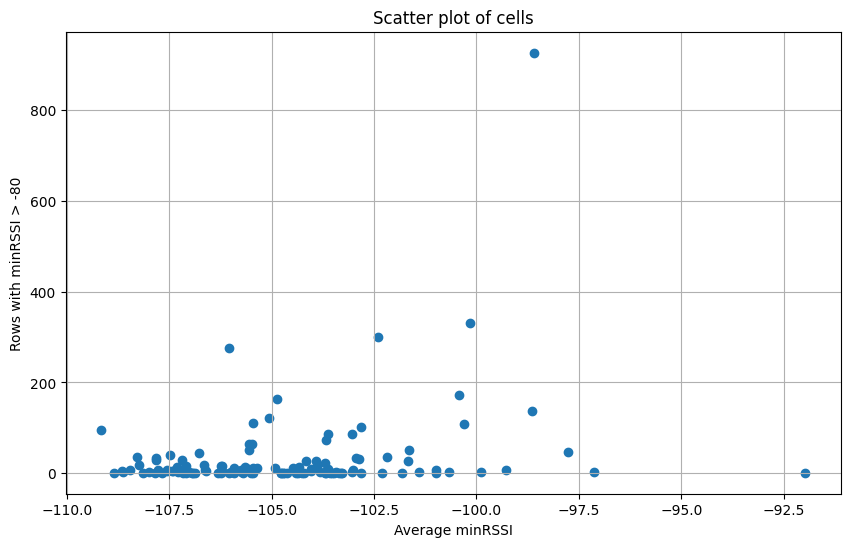

In [6]:
# Calculate the number of rows where minRSSI is above -80 for each cell
df['rows_over_-80'] = df[df['minRSSI'] > -80].groupby('cell')['minRSSI'].transform('count')

# Calculate the average minRSSI for each cell
avg_minRSSI = df.groupby('cell')['minRSSI'].mean().reset_index()
avg_minRSSI.columns = ['cell', 'avg_minRSSI']

# Merge the dataframes to get the required data
scatter_data = pd.merge(avg_minRSSI, df[['cell', 'rows_over_-80']].drop_duplicates(), on='cell')

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(scatter_data['avg_minRSSI'], scatter_data['rows_over_-80'])
plt.xlabel('Average minRSSI')
plt.ylabel('Rows with minRSSI > -80')
plt.title('Scatter plot of cells')
plt.grid(True)
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


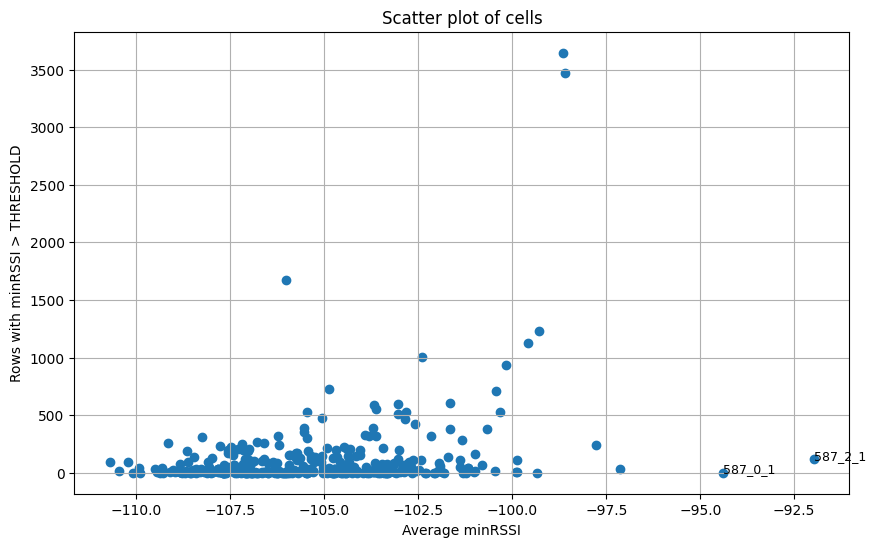

In [11]:
THRESHOLD = -90

# Calculate the number of rows where minRSSI is above the threshold for each cell
df['AnomalyThreshNum'] = df[df['minRSSI'] > THRESHOLD].groupby('cell')['minRSSI'].transform('count')

# Calculate the average minRSSI for each cell
avg_minRSSI = df.groupby('cell')['minRSSI'].mean().reset_index()
avg_minRSSI.columns = ['cell', 'avg_minRSSI']

# Merge the dataframes to get the required data
scatter_data = pd.merge(avg_minRSSI, df[['cell', 'AnomalyThreshNum']].drop_duplicates(), on='cell')

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(scatter_data['avg_minRSSI'], scatter_data['AnomalyThreshNum'])

# Add labels for top 5 and bottom 5 cells in terms of avg_minRSSI
top_5_cells = scatter_data.nsmallest(5, 'avg_minRSSI')
bottom_5_cells = scatter_data.nlargest(5, 'avg_minRSSI')

for i, row in top_5_cells.iterrows():
    plt.text(row['avg_minRSSI'], row['AnomalyThreshNum'], row['cell'], fontsize=9, ha='right')

for i, row in bottom_5_cells.iterrows():
    plt.text(row['avg_minRSSI'], row['AnomalyThreshNum'], row['cell'], fontsize=9, ha='left')

plt.xlabel('Average minRSSI')
plt.ylabel('Rows with minRSSI > THRESHOLD')
plt.title('Scatter plot of cells')
plt.grid(True)
plt.show()

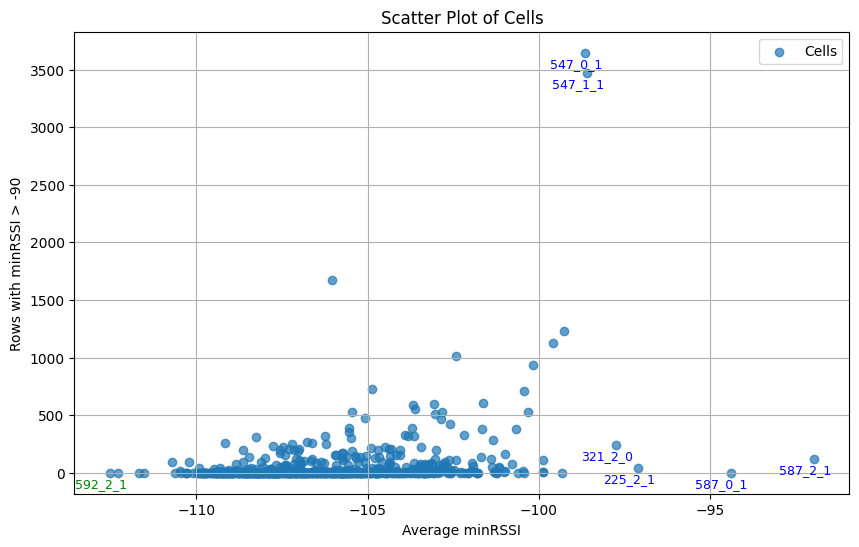

In [30]:
THRESHOLD = -90

# Ensure the 'minRSSI' column is numeric
df['minRSSI'] = pd.to_numeric(df['minRSSI'], errors='coerce')

# Calculate the number of rows where minRSSI is above the threshold for each cell
df['AnomalyThreshNum'] = df['minRSSI'].gt(THRESHOLD).groupby(df['cell']).transform('sum')

# Calculate the average minRSSI for each cell
avg_minRSSI = df.groupby('cell')['minRSSI'].mean().reset_index()
avg_minRSSI.columns = ['cell', 'avg_minRSSI']

# Merge the dataframes to get the required data
scatter_data = pd.merge(avg_minRSSI, df[['cell', 'AnomalyThreshNum']].drop_duplicates(), on='cell')

# Remove rows with NaN or infinite values
scatter_data = scatter_data.replace([np.inf, -np.inf], np.nan).dropna()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(scatter_data['avg_minRSSI'], scatter_data['AnomalyThreshNum'], alpha=0.7, label='Cells')

# Add labels for top and bottom cells in terms of avg_minRSSI
top_cells = scatter_data.nlargest(6, 'avg_minRSSI')
bottom_cells = scatter_data.nsmallest(1, 'avg_minRSSI')

# Offset for labels
x_offset = 0.5
y_offset = -125

for i, row in top_cells.iterrows():
    plt.text(
        row['avg_minRSSI'] + x_offset,  # Add horizontal offset
        row['AnomalyThreshNum'] + y_offset,  # Add vertical offset
        row['cell'], 
        fontsize=9, 
        ha='right', 
        color='blue'
    )

for i, row in bottom_cells.iterrows():
    plt.text(
        row['avg_minRSSI'] + x_offset,
        row['AnomalyThreshNum'] + y_offset,
        row['cell'], 
        fontsize=9, 
        ha='right', 
        color='green'
    )

plt.xlabel('Average minRSSI')
plt.ylabel(f'Rows with minRSSI > {THRESHOLD}')
plt.title('Scatter Plot of Cells')
plt.grid(True)
plt.legend()
plt.show()

In [25]:
# Calculate the number of cells where at least one minRSSI is over -90
cells_over_threshold = df[df['minRSSI'] > THRESHOLD]['cell'].nunique()

# Calculate the total number of unique cells
total_cells = df['cell'].nunique()

# Calculate the percentage
percentage_cells_over_threshold = (cells_over_threshold / total_cells) * 100

# Print the results
print(f"Cells with minRSSI over the threshold (abs): {cells_over_threshold}")
print(f"Cells with minRSSI over the threshold (prop): {percentage_cells_over_threshold:.2f}%")

Cells with minRSSI over the threshold (abs): 350
Cells with minRSSI over the threshold (prop): 52.40%


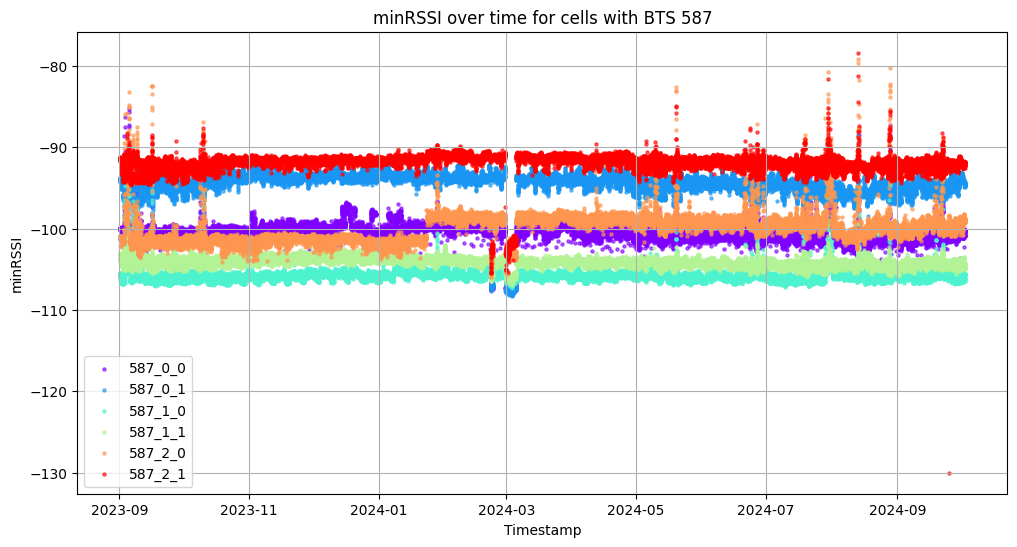

In [50]:
sel_bts = 587

# Filter the dataframe for cells with the selected BTS value
df_bts = df[df['bts'] == sel_bts].copy()

# Convert the timestamp column to datetime
df_bts['timestamp'] = pd.to_datetime(df_bts['timestamp'])

# Plot the minRSSI over time as a scatter plot
plt.figure(figsize=(12, 6))
colors = plt.cm.rainbow(np.linspace(0, 1, df_bts['cell'].nunique()))

for color, cell in zip(colors, df_bts['cell'].unique()):
    cell_data = df_bts[df_bts['cell'] == cell]
    plt.scatter(cell_data['timestamp'], cell_data['minRSSI'], label=cell, color=color, alpha=0.6, s=5)

plt.xlabel('Timestamp')
plt.ylabel('minRSSI')
plt.title(f'minRSSI over time for cells with BTS {sel_bts}')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
# Filter the dataframe for cells with at least 10 instances of minRSSI going over -90
subset_df = df[df['AnomalyThreshNum'] >= 10]

# Calculate the number of cells in the subset
cells_in_subset = subset_df['cell'].nunique()

# Calculate the total number of unique cells
total_cells = df['cell'].nunique()

# Calculate the percentage
percentage_cells_in_subset = (cells_in_subset / total_cells) * 100

# Print the results
print(f"Cells with at least 10 instances of minRSSI over the threshold (abs): {cells_in_subset}")
print(f"Cells with at least 10 instances of minRSSI over the threshold (prop): {percentage_cells_in_subset:.2f}%")

Cells with at least 10 instances of minRSSI over the threshold (abs): 210
Cells with at least 10 instances of minRSSI over the threshold (prop): 31.44%


In [45]:
def summary_stats(df):
    # Check if 'timestamp' is in datetime format, if not, convert it
    if not pd.api.types.is_datetime64_any_dtype(df['timestamp']):
        df['timestamp'] = pd.to_datetime(df['timestamp'])

    warnings.filterwarnings('ignore')

    total_instances = len(df)
    total_anomalies = df['anomaly'].sum()
    anomaly_percentage = f"{(total_anomalies / total_instances) * 100:.4f} %" if total_instances > 0 else "0.00 %"
    total_cells = df['cell'].nunique()
    cells_with_anomalies = df['cell'][df['anomaly'] == 1].nunique()
    cell_anomaly_percentage = f"{(cells_with_anomalies / total_cells) * 100:.4f} %" if total_cells > 0 else "0.00 %"

    # Calculate total days using the unique dates derived from the timestamp
    total_days = df['timestamp'].dt.date.nunique()
    # Calculate days with anomalies by filtering the DataFrame
    days_with_anomalies = df.loc[df['anomaly'] == 1, 'timestamp'].dt.date.nunique()
    
    # Calculate the percentage of days with anomalies
    day_anomaly_percentage = f"{(days_with_anomalies / total_days) * 100:.4f} %" if total_days > 0 else "0.00 %"

    # Output the summary statistics
    return {
        'Total Instances': total_instances,
        'Total Anomalies': total_anomalies,
        'Anomaly Percentage': anomaly_percentage,
        'Total Cells': total_cells,
        'Cells with Anomalies': cells_with_anomalies,
        'Cells with Anomalies (pct)': cell_anomaly_percentage,
        'Total Days': total_days,
        'Days with Anomalies': days_with_anomalies,
        'Days with Anomalies (pct)': day_anomaly_percentage
    }

In [40]:
# Add an 'anomaly' column to the dataframe based on the THRESHOLD
df['anomaly'] = df['minRSSI'] > THRESHOLD

summary_stats(df)

{'Total Instances': 12741835,
 'Total Anomalies': 39480,
 'Anomaly Percentage': '0.3098 %',
 'Total Cells': 668,
 'Cells with Anomalies': 350,
 'Cell Anomaly Percentage': '52.3952 %',
 'Total Days': 398,
 'Days with Anomalies': 380,
 'Day Anomaly Percentage': '95.4774 %'}

In [46]:
subset_df['anomaly'] = subset_df['minRSSI'] > THRESHOLD

summary_stats(subset_df)

/var/folders/hv/7c6y54956n9_w4470fs3q8c00000gn/T/ipykernel_17303/1078958425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['anomaly'] = subset_df['minRSSI'] > THRESHOLD


{'Total Instances': 4004343,
 'Total Anomalies': 39099,
 'Anomaly Percentage': '0.9764 %',
 'Total Cells': 210,
 'Cells with Anomalies': 210,
 'Cells with Anomalies (pct)': '100.0000 %',
 'Total Days': 398,
 'Days with Anomalies': 378,
 'Days with Anomalies (pct)': '94.9749 %'}